## Voorspelling watertemperatuur bij reservoirs

### Data analyse

Via eerder geschreven scripts (data.py) kan de data opgehaald worden. Het betreft hier **gemiddelde dagwaarden** voor de periode van 01-01-2015 tot heden. De resultaten worden als een groot csv bestand weggeschreven in data/combined_data.

De kolommen staan voor de volgende locaties van sensormetingen;

| tag | locatie | omschrijving |
|------|------|------|
| 1N305KM01TIT001 |  Nieuwegein Inname - Ruwwater |	Inname Lekkanaal |
| 1N625SW03TT001  |  Nieuwegein Snelfiltratie WRK I (voor snelfiltratie) | WBC voor snelfiltratie |
| 1N625SW02TT001  |  Nieuwegein Snelfiltratie WRK II (voor snelfiltratie) | WBC voor snelfiltratie |
| 1N315KM01TIT001 | Nieuwegein Transport - WRK I Filtraat | WBC na snelfiltratie |
| 1N315KM02TIT003 | Nieuwegein Transport - WRK II Filtraat | WBC na snelfiltratie |
| | | |
| 1Q325TB03TT151  | MIS Transport - WRK water Nieuwerkerkerstraat Lijnden | aftakking WRK II naar Havengebied |
| 1D325TA01TT001  | MIS Transport - WRK water Vogelenzang | Precieze locatie onbekend |
| T-WRK-Schiphol_STUW12 | MIS Transport WRK water stuw 12 | AWD voor infiltratie |
| | | |
| 1L635KM05TT002  | LDN Hardheidsreductie - onthard water afvoer West | Leiduin na ontharding |
| 1L635KM05TT001  | LDN Hardheidsreductie - onthard water afvoer Oost | Leiduin na ontharding |
| 1L315KM01TT001  | LDN Transport - Leiduin I Drinkwater | Leiduin drinkwater af pomp |
| | | |
| 3H325WT01TT001  | HLW Distributie - Haarlemmerweg Drinkwater | Pompstation Haarlemmerweg |
| 3A415DR01_Temp1 | AVW Drinkwaterreservoir 5 Ingaand HV085 | Pompstation Amstelveenseweg voor reservoir 5 |
| 3A415DR01_Temp2 | AVW Drinkwaterreservoir 5 Ingaand HV086 | Pompstation Amstelveenseweg voor reservoir 5 |
| 3A415DR01_Temp3 | AVW Drinkwaterreservoir 5 Uitgaand HV054 | Pompstation Amstelveenseweg na reservoir 5 |
| 3A415DR01_Temp4 | AVW Drinkwaterreservoir 1 Ingaand HV061 | Pompstation Amstelveenseweg voor reservoir 1 |
| 3A415DR01_Temp5 | AVW Drinkwaterreservoir 1 Ingaand HV062 | Pompstation Amstelveenseweg voor reservoir 1 |
| 3A415DR01_Temp6 | AVW Drinkwaterreservoir 1 Uitgaand HV038 | Pompstation Amstelveenseweg na reservoir 1 |

We lezen eerst de gemiddelde data per dag in om te kijken hoe de data eruit ziet.

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import data
import datetime

%matplotlib inline

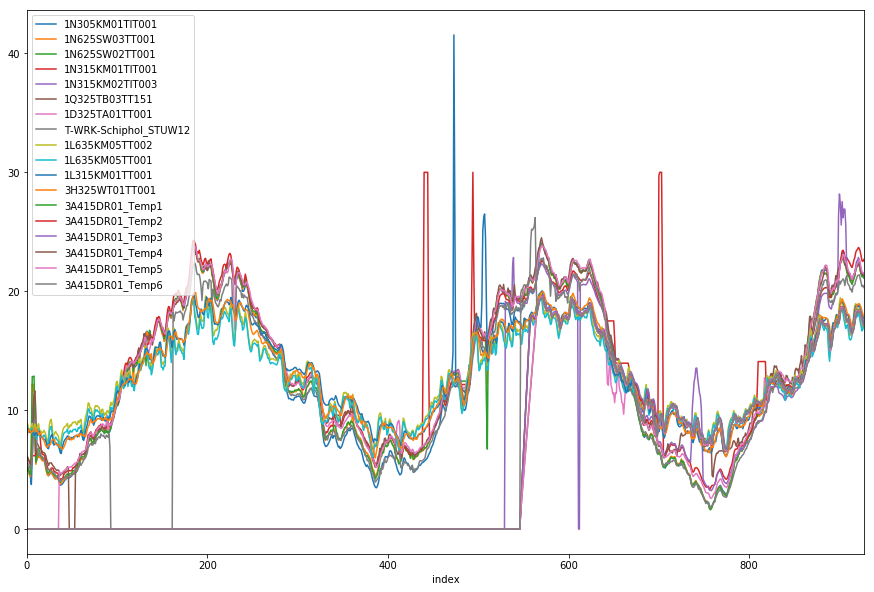

In [2]:
df = pd.read_csv('data/combined_data.csv')
df = df.reset_index()
df.plot(x='index', y=data.TAGS[:], figsize=(15,10))
plt.show()

#### Prophet library toepassen

Een eerste mogelijkheid is het kijken naar de toepassing van een timeseries prediction algoritme dat verder geen afhankelijkheden bekijkt. We gebruiken hiervoor Prophet https://github.com/facebookincubator/prophet waar in het testproject van het Waternet datalab https://github.com/waternet/datalab_alg_prophet_test al code voor is geschreven.

We beginnen met de gewone toepassing van prophet en zoek een geschikte data serie aan de output kant.

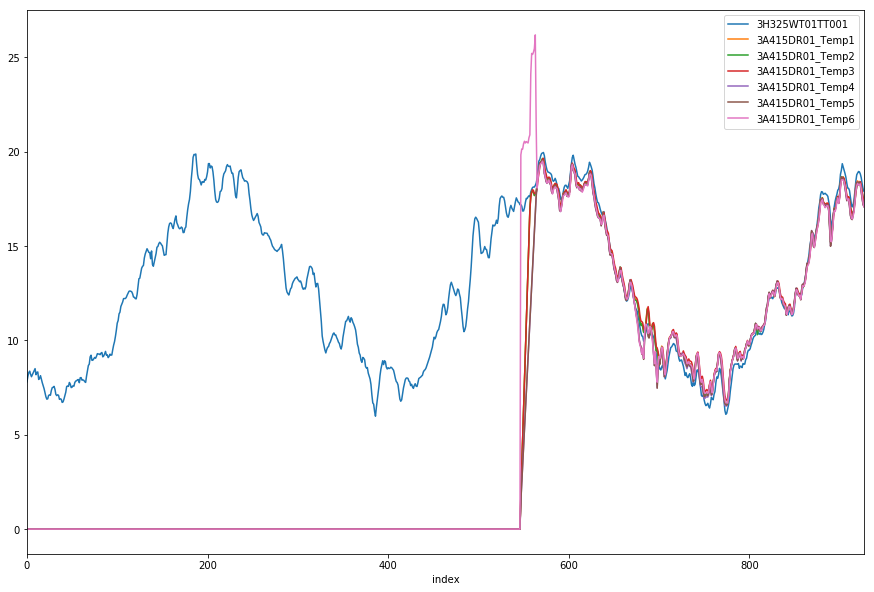

In [3]:
df.plot(x='index', y=data.TAGS_OUTPUT, figsize=(15,10))

De langst lopende temperatuurmeting is die van de Haarlemmerweg, deze gebruiken we voor de predictie via prophet.

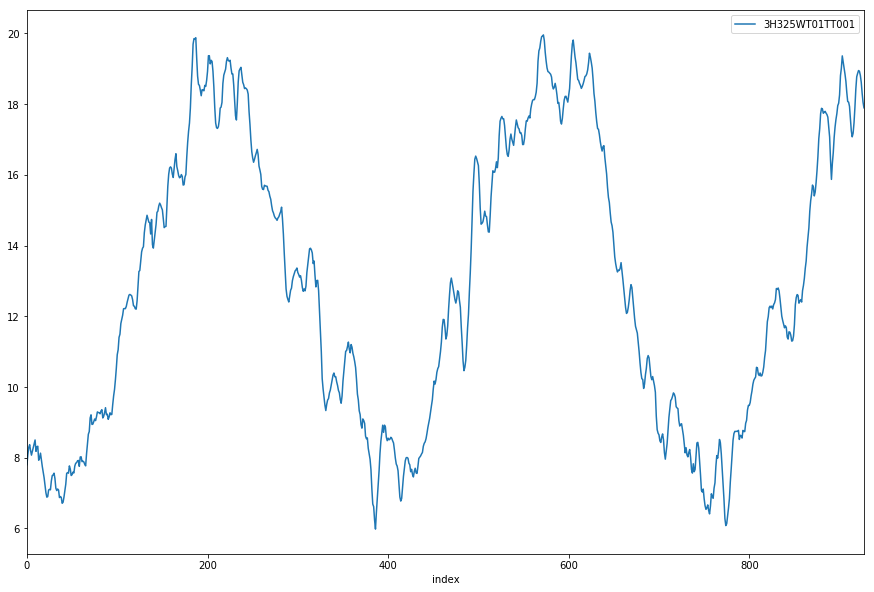

In [11]:
df.plot(x='index', y=['3H325WT01TT001'], figsize=(15,10))

We maken de data klaar voor Prophet waarbij een 'ds' kolom nodig is met datetimes en een 'y' kolom met outputs. We hebben data onttrokken vanaf 01-01-2015

In [14]:
startdate = datetime.date(2015, )

df_hw = pd.DataFrame()
df_hw['y'] = df['3H325WT01TT001']


df_hw.head()


,y
0,7.804
1,8.087
2,8.294
3,8.370
4,8.204


De volgende stap is om het model te trainen.

In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(df_hw)